In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [74]:
df = pd.read_csv("/content/drive/MyDrive/portfolio/Customer Personality Analysis/marketing_campaign.csv",sep="\t")

In [75]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [76]:
len(df)

2240

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [78]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [79]:
# Remove the rows with null data
df.dropna()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [80]:
# Data Type of Dt_customer should be datetime (before it's object)
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")
date_latest = df["Dt_Customer"].max()
date_oldest = df["Dt_Customer"].min()
df["Existing_Day"] = (date_latest - df["Dt_Customer"]).dt.days

In [81]:
df.select_dtypes(include=['object']).columns

Index(['Education', 'Marital_Status'], dtype='object')

In [82]:
# Check categorical column distribution
df['Education'].value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


In [83]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [84]:
df.columns = df.columns.str.lower()

In [85]:
# Add column "Age"from "Year_Birth".
current_year = datetime.today().year

# Calculate age
df["age"] = current_year - df["year_birth"]

# Create 'total_spending'
df["total_spending"] = df["mntwines"]+df["mntfruits"]+df["mntmeatproducts"]+df["mntfishproducts"]+df["mntsweetproducts"]+df["mntgoldprods"]

#Deriving living situation by marital status "Alone"
df["living_with"]=df["marital_status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})

#Feature indicating total children living in the household
df["children"] = df["kidhome"]+df["teenhome"]

#Feature for total members in the householde
df["family_size"] = df["living_with"].replace({"Alone": 1, "Partner":2})+ df["children"]

#Feature pertaining parenthood
df["is_parent"] = np.where(df.children > 0, 1, 0)

#Segmenting education levels in three groups
df["education"] = df["education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
df = df.rename(columns = {"mntwines": "wines","mntfruits":"fruits","mntmeatproducts":"meat","mntfishproducts":"fish","mntsweetproducts":"sweets","mntgoldprods":"gold"})

#Dropping some of the redundant features
features_drop = ["marital_status", "dt_customer", "z_costcontact", "z_revenue", "year_birth", "id"]
df = df.drop(features_drop, axis=1)

<ipython-input-85-a25ffcdfd8f3>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["family_size"] = df["living_with"].replace({"Alone": 1, "Partner":2})+ df["children"]


In [86]:
df.describe()

,income,kidhome,teenhome,recency,wines,fruits,meat,fish,sweets,gold,...,acceptedcmp1,acceptedcmp2,complain,response,existing_day,age,total_spending,children,family_size,is_parent
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,0.064286,0.013393,0.009375,0.149107,353.582143,56.194196,605.798214,0.950446,2.595089,0.715179
std,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,0.245316,0.114976,0.096391,0.356274,202.122512,11.984069,602.249288,0.751803,0.906959,0.451430
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,180.750000,48.000000,68.750000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,355.500000,55.000000,396.000000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,529.000000,66.000000,1045.500000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,1.000000,1.000000,699.000000,132.000000,2525.000000,3.000000,5.000000,1.000000


In [87]:
def remove_outliers(df, columns, threshold = 1.5):

    df_filtered = df.copy()

    for col in columns:
        if col in df_filtered.columns:
            Q1 = df_filtered[col].quantile(0.25)
            Q3 = df_filtered[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR

            df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]

    return df_filtered

features_plot = ["income", "recency", "existing_day", "age", "total_spending"]
df_filtered = remove_outliers(df, features_plot)

In [88]:
df_filtered

,education,income,kidhome,teenhome,recency,wines,fruits,meat,fish,sweets,...,acceptedcmp2,complain,response,existing_day,age,total_spending,living_with,children,family_size,is_parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,663,68,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,113,71,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,312,60,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,139,41,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,161,44,422,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,381,58,1341,Partner,1,3,1
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,19,79,444,Partner,3,5,1
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,155,44,1241,Alone,0,1,0
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,156,69,843,Partner,1,3,1


Pairplot After Outlier Removal


<Figure size 1200x800 with 0 Axes>

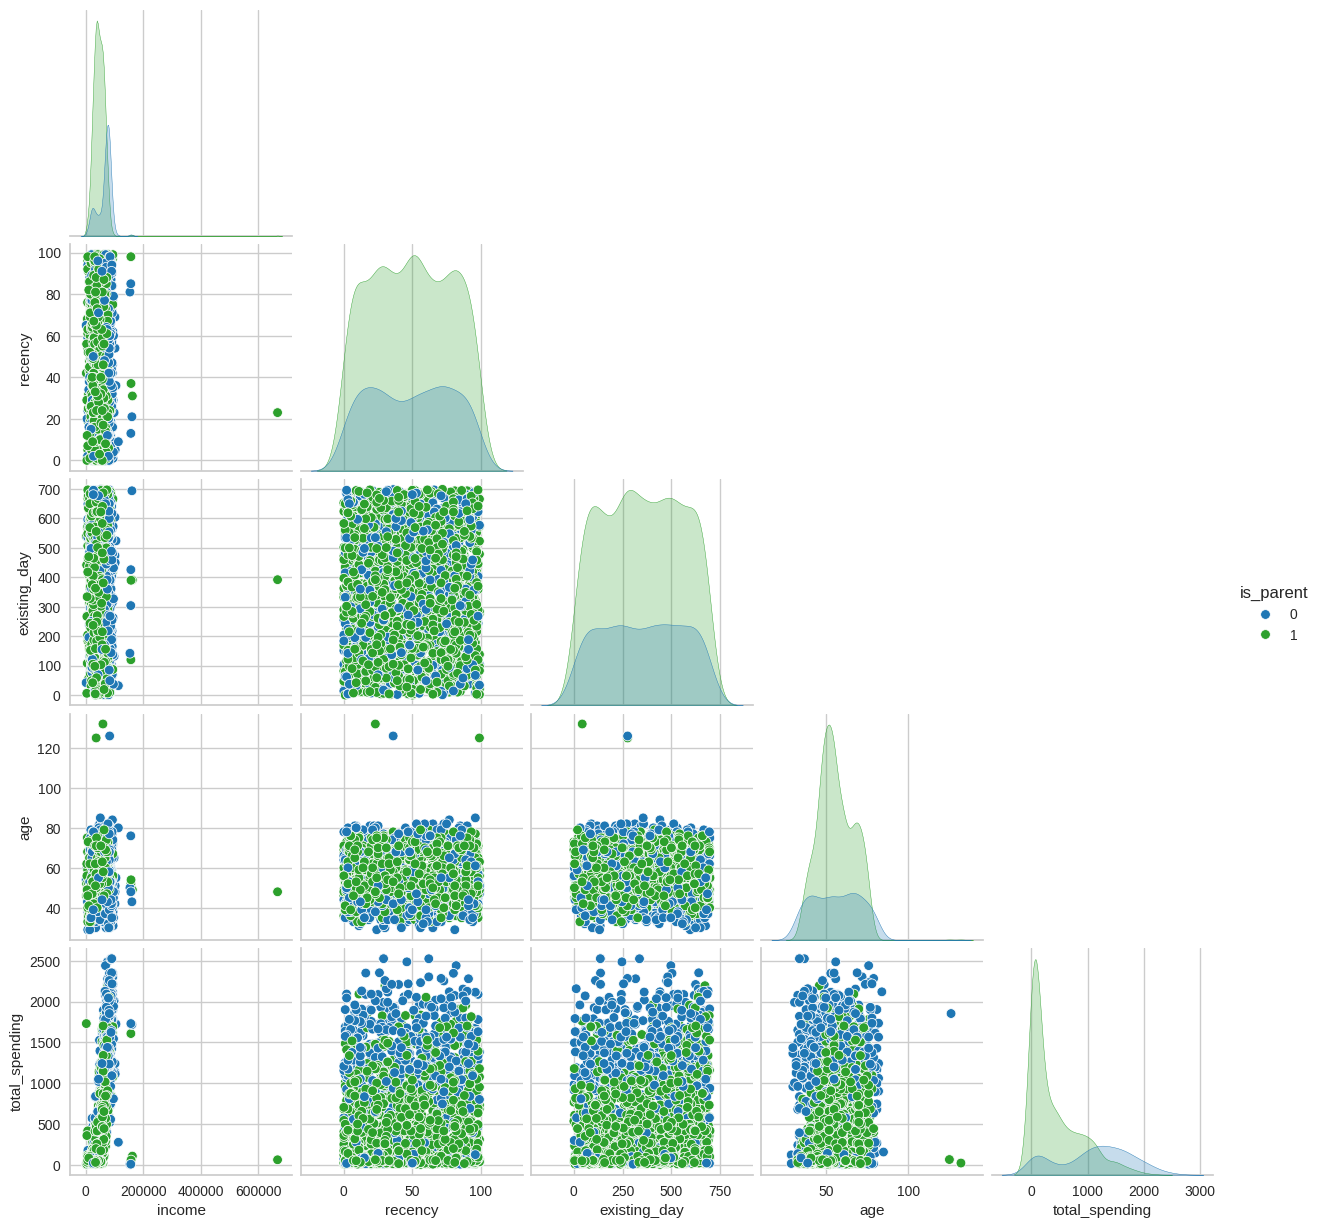

In [89]:
palette = ["#1F77B4", "#2CA02C"]

# Selected features for the pairplot
features_plot = ["income", "recency", "existing_day", "age", "total_spending"]

df_filtered = df[features_plot + ["is_parent"]]

print("Pairplot After Outlier Removal")
plt.figure(figsize=(12, 8))
sns.pairplot(df_filtered, hue="is_parent", palette=palette, corner=True, diag_kind="kde")

plt.show()

In [90]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Separate numerical and categorical DataFrames if needed
df_numerical = df[numerical_cols]
df_categorical = df[categorical_cols]

print("Numerical Columns:", numerical_cols.tolist())
print("Categorical Columns:", categorical_cols.tolist())

Numerical Columns: ['income', 'kidhome', 'teenhome', 'recency', 'wines', 'fruits', 'meat', 'fish', 'sweets', 'gold', 'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2', 'complain', 'response', 'existing_day', 'age', 'total_spending', 'children', 'family_size', 'is_parent']
Categorical Columns: ['education', 'living_with']


<Axes: >

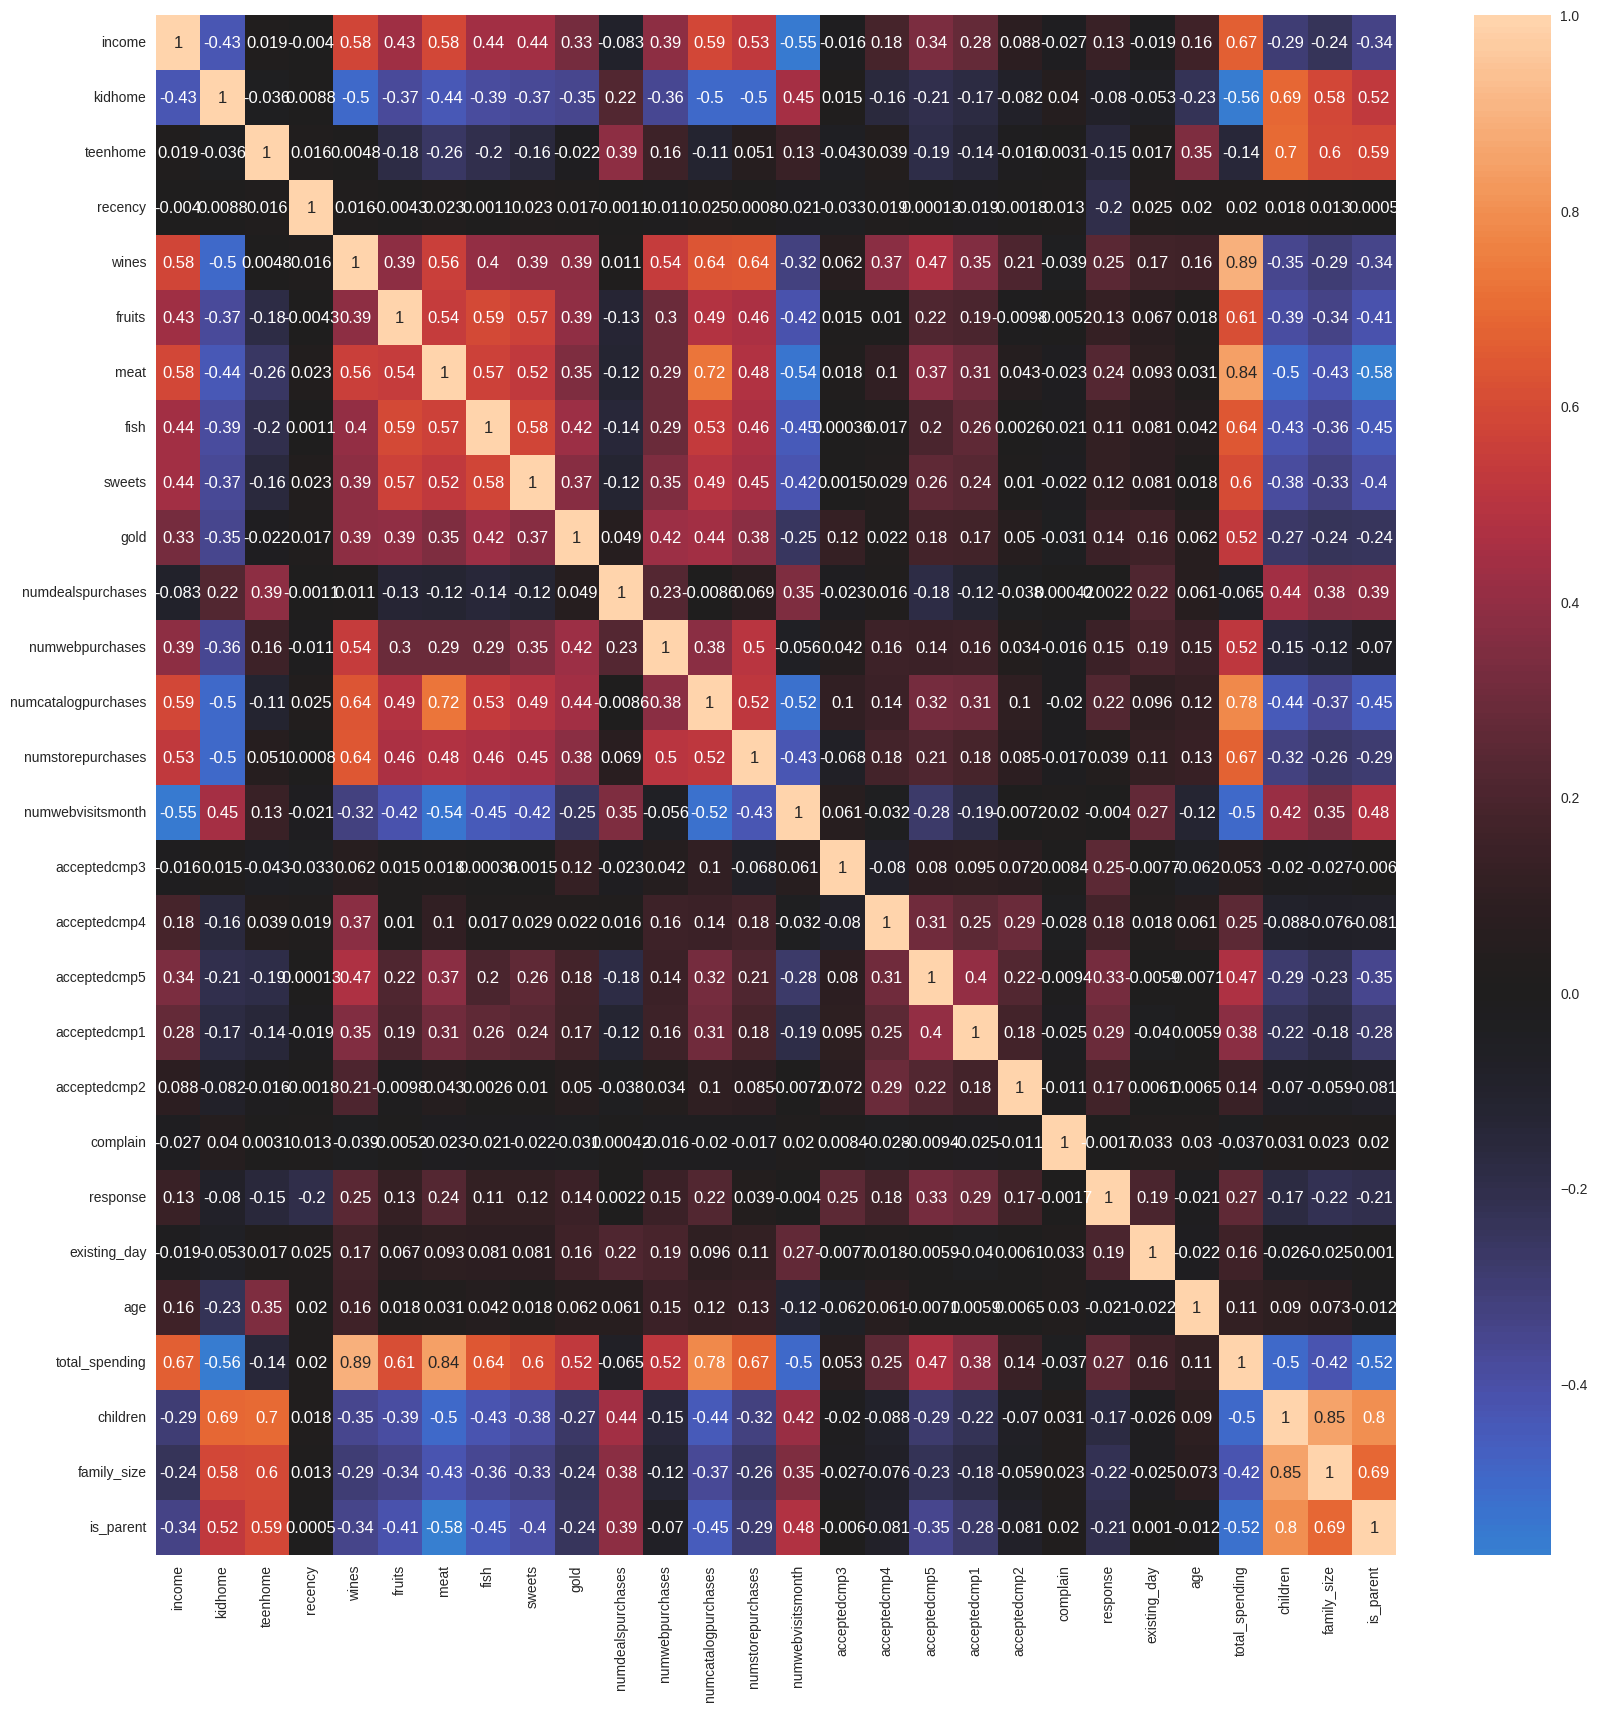

In [91]:
#correlation matrix
corrmat= df_numerical.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, annot=True, center=0)

## Data Preprocessing

1. Label encoding the categorical features
2. Scale the features using the standard scaler
3. Create a subset dataframe for dimensionality reduction

In [92]:
# Label Encoding for Education (Ordinal)
LE = LabelEncoder()
df["education"] = LE.fit_transform(df["education"])

# One-Hot Encoding for Living_With (Nominal)
# Drop first to avoid multicollinearity
df = pd.get_dummies(df, columns=['living_with'], drop_first=True)

# Display updated dataset
print(df.head())

   education   income  kidhome  teenhome  recency  wines  fruits  meat  fish  \
0          0  58138.0        0         0       58    635      88   546   172   
1          0  46344.0        1         1       38     11       1     6     2   
2          0  71613.0        0         0       26    426      49   127   111   
3          0  26646.0        1         0       26     11       4    20    10   
4          1  58293.0        1         0       94    173      43   118    46   

   sweets  ...  acceptedcmp2  complain  response  existing_day  age  \
0      88  ...             0         0         1           663   68   
1       1  ...             0         0         0           113   71   
2      21  ...             0         0         0           312   60   
3       3  ...             0         0         0           139   41   
4      27  ...             0         0         0           161   44   

   total_spending  children  family_size  is_parent  living_with_Partner  
0            1617

In [93]:
# creating a subset of dataframe by dropping the features on deals accepted and promotions
# These features might not be useful for clustering or modeling, as they relate to marketing campaigns rather than customer characteristics.
cols_del = ['acceptedcmp1','acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'complain', 'response']
df = df.drop(cols_del, axis=1)

print(df.isnull().sum())

education               0
income                 24
kidhome                 0
teenhome                0
recency                 0
wines                   0
fruits                  0
meat                    0
fish                    0
sweets                  0
gold                    0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
existing_day            0
age                     0
total_spending          0
children                0
family_size             0
is_parent               0
living_with_Partner     0
dtype: int64


In [94]:
df = df.dropna()

In [95]:
# Scaling needed: Some features (like income, total_spending) have much larger values than others (kidhome, teenhome). Scaling standardizes numerical features to the same scale (mean=0, std=1).
# Many clustering and distance-based models (e.g., K-Means, PCA, Agglomerative Clustering) work better with scaled data.
scaler = StandardScaler()
scaler.fit(df)
df_scaled= pd.DataFrame(scaler.transform(df),columns= df.columns)

## Dimension Reduction with PCA

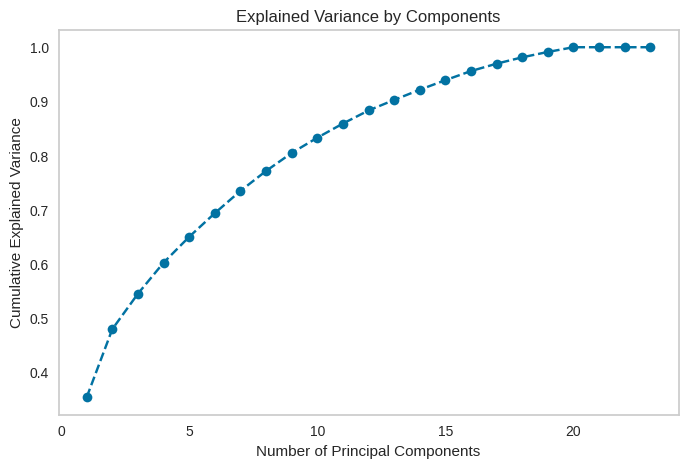

In [96]:
# Apply PCA with all components
pca = PCA(n_components=None)
pca.fit(df_scaled)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(),
         marker='o',
         linestyle='--'
)

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid()
plt.show()

In [97]:
# Get cumulative explained variance
explained_variance_cumsum = np.cumsum(pca.explained_variance_ratio_)

# Print variance retained for different numbers of components
for n in [5, 7, 10, 12]:
    print(f"Variance explained by {n} components: {explained_variance_cumsum[n-1]:.2f}")

Variance explained by 5 components: 0.65
Variance explained by 7 components: 0.73
Variance explained by 10 components: 0.83
Variance explained by 12 components: 0.88


In [98]:
# Re-run PCA with optimal components
num_components = 7
pca = PCA(n_components=num_components)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), columns=[f"PC{i+1}" for i in range(num_components)])

print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7
0  5.019430 -0.083789  2.407365 -0.165895 -1.077275  0.418962 -0.449523
1 -2.894196 -0.053671 -1.485739 -1.375360 -1.760130 -0.573942 -0.027214
2  2.578439 -0.728850 -0.250629 -0.001264  0.654533 -0.604113 -1.587961
3 -2.586061 -1.441631 -0.391762  1.320295 -0.315351 -0.907769 -0.703140
4 -0.685784  0.176314 -0.133249  1.633528 -0.246015  0.981154  1.426681


## K-Means Clustering

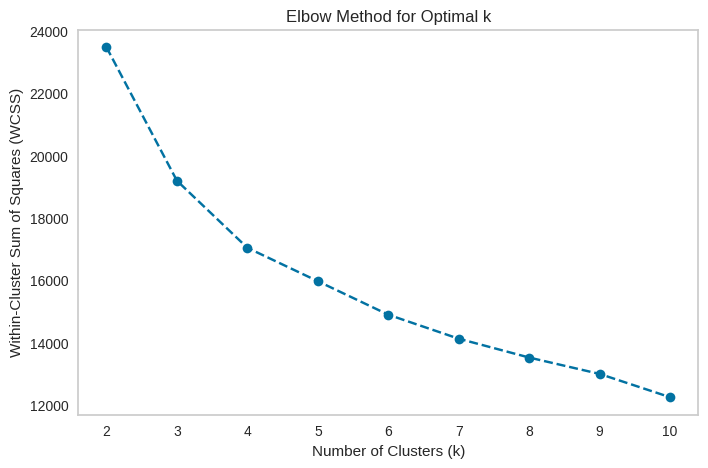

In [99]:
# Finding the Optimal Number of Clusters (Elbow Method)
# WCSS (Within-Cluster Sum of Squares) WCSS calculates the sum of squared distances between each data point and its assigned cluster center > to minimize WCSS

wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    # store the sum of squared distances
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

In [100]:
# Based on the elbow method, we set optimal number = 4
optimal_k = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_pca["cluster"] = kmeans.fit_predict(df_pca)

print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  5.019430 -0.083789  2.407365 -0.165895 -1.077275  0.418962 -0.449523   
1 -2.894196 -0.053671 -1.485739 -1.375360 -1.760130 -0.573942 -0.027214   
2  2.578439 -0.728850 -0.250629 -0.001264  0.654533 -0.604113 -1.587961   
3 -2.586061 -1.441631 -0.391762  1.320295 -0.315351 -0.907769 -0.703140   
4 -0.685784  0.176314 -0.133249  1.633528 -0.246015  0.981154  1.426681   

   cluster  
0        3  
1        1  
2        3  
3        2  
4        1  


In [101]:
from sklearn.metrics import silhouette_score

# Ensure that df_pca contains the features used for clustering (e.g., after PCA transformation)
X = df_pca.drop("cluster", axis=1)  # Exclude the cluster column for evaluation

labels = df_pca["cluster"]

# Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.22372211942748496


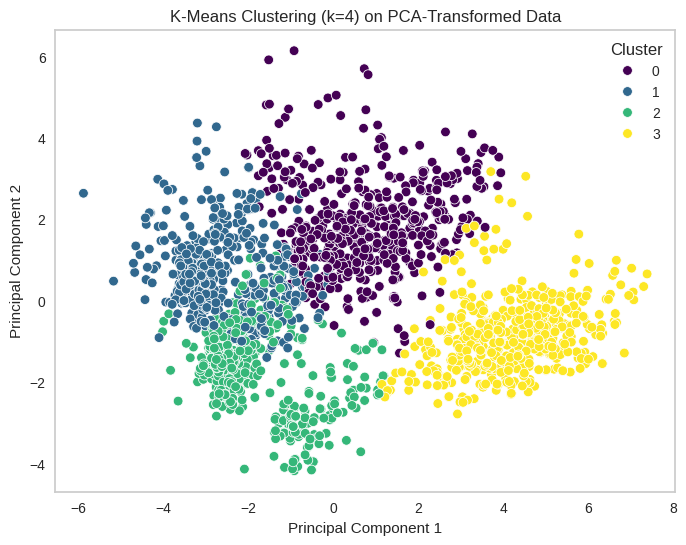

In [102]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["cluster"], palette="viridis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"K-Means Clustering (k={optimal_k}) on PCA-Transformed Data")
plt.legend(title="Cluster")
plt.grid()
plt.show()

In [103]:
# Check the Distribution of Data Points in Each Cluster
print(df_pca["cluster"].value_counts())

cluster
2    603
0    570
1    532
3    511
Name: count, dtype: int64


In [104]:
# Get cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=[f"PC{i+1}" for i in range(7)])
print(cluster_centers)

        PC1       PC2       PC3       PC4       PC5       PC6       PC7
0  0.778368  1.881957  0.307944 -0.362519  0.085018 -0.068124 -0.077920
1 -2.618767  0.680127 -0.784592 -0.163538 -0.209999  0.029982  0.094530
2 -1.970017 -1.673312  0.581323  0.310098  0.120505  0.026444 -0.078181
3  4.176199 -0.835103 -0.214785  0.209096 -0.018983  0.013763  0.081096


In [105]:
# assigning clusters to the original dataset
# use iloc to force alignment to ensure that the cluster assignments match row by row.

df['cluster'] = df_pca['cluster'].values

In [106]:
# Check Cluster Sizes
print(df["cluster"].value_counts())

cluster
2    603
0    570
1    532
3    511
Name: count, dtype: int64


In [107]:
cluster_means = df.groupby("cluster").mean()
print(cluster_means)

         education        income   kidhome  teenhome    recency       wines  \
cluster                                                                       
0         0.550877  61431.312281  0.185965  0.947368  48.491228  524.043860   
1         0.616541  43415.960526  0.783835  1.015038  50.323308   84.776316   
2         0.704809  30286.258706  0.747927  0.034826  48.291874   35.583748   
3         0.561644  77111.851272  0.009785  0.037182  49.080235  608.258317   

            fruits        meat       fish     sweets  ...  \
cluster                                               ...   
0        32.178947  177.338596  43.168421  33.900000  ...   
1         4.456767   29.253759   6.024436   4.178571  ...   
2         6.615257   26.449420  10.262023   6.782753  ...   
3        65.954990  464.712329  96.684932  67.045010  ...   

         numcatalogpurchases  numstorepurchases  numwebvisitsmonth  \
cluster                                                              
0                 

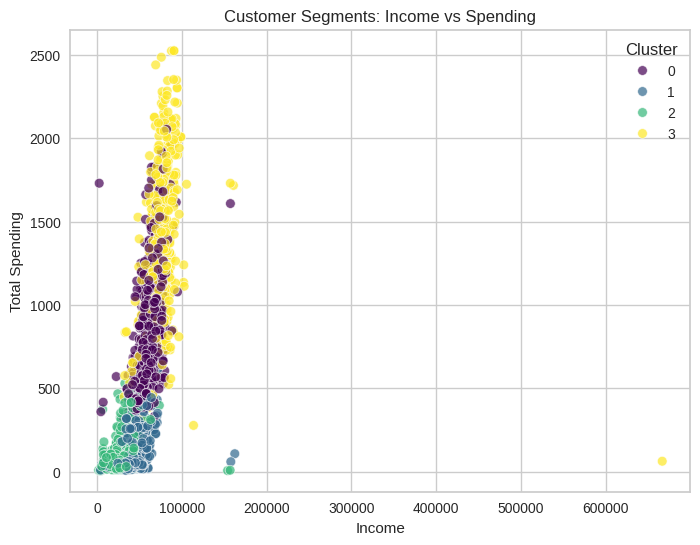

In [108]:
# Spending vs Income by Cluster
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["income"], y=df["total_spending"], hue=df["cluster"], palette="viridis", alpha=0.7)
plt.title("Customer Segments: Income vs Spending")
plt.xlabel("Income")
plt.ylabel("Total Spending")
plt.legend(title="Cluster")
plt.show()

In [109]:
df.columns

Index(['education', 'income', 'kidhome', 'teenhome', 'recency', 'wines',
       'fruits', 'meat', 'fish', 'sweets', 'gold', 'numdealspurchases',
       'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases',
       'numwebvisitsmonth', 'existing_day', 'age', 'total_spending',
       'children', 'family_size', 'is_parent', 'living_with_Partner',
       'cluster'],
      dtype='object')

In [110]:
# Calculate summary statistics for each cluster
cluster_summary = df.groupby("cluster").agg(["mean", "std", "min", "max"])

# Display the summary statistics
print(cluster_summary)

        education                          income                         \
             mean       std min max          mean           std      min   
cluster                                                                    
0        0.550877  0.623253   0   2  61431.312281  11921.979874   2447.0   
1        0.616541  0.631523   0   2  43415.960526  13691.687582   4023.0   
2        0.704809  0.787629   0   2  30286.258706  12946.116843   1730.0   
3        0.561644  0.656503   0   2  77111.851272  28900.929041  31907.0   

                    kidhome            ... family_size     is_parent  \
              max      mean       std  ...         min max      mean   
cluster                                ...                             
0        157243.0  0.185965  0.393907  ...           1   5  0.984211   
1        162397.0  0.783835  0.562716  ...           2   5  1.000000   
2        156924.0  0.747927  0.456923  ...           1   4  0.772803   
3        666666.0  0.009785  0.0985

<ipython-input-111-53a63514a8b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='viridis')


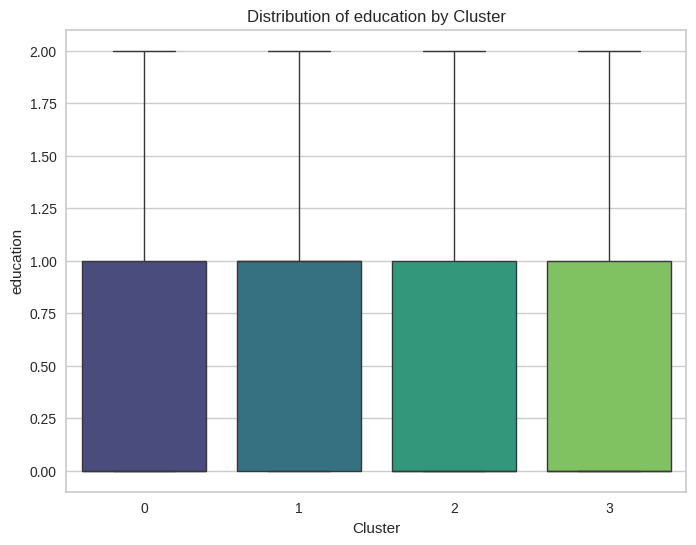

<ipython-input-111-53a63514a8b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='viridis')


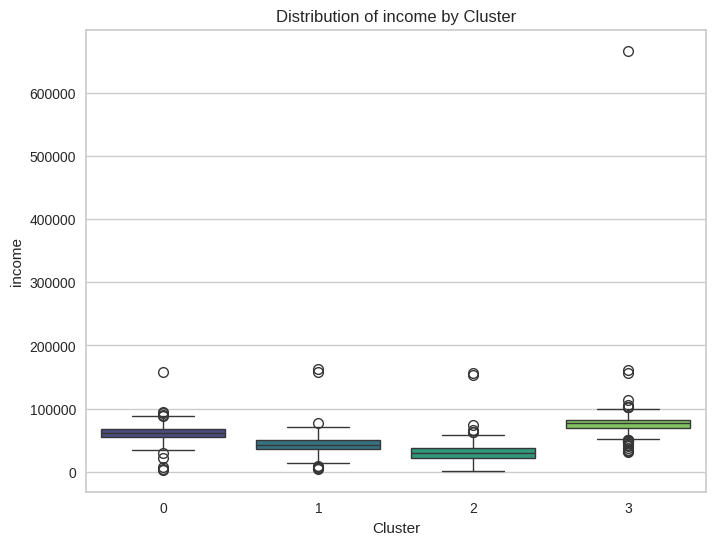

<ipython-input-111-53a63514a8b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='viridis')


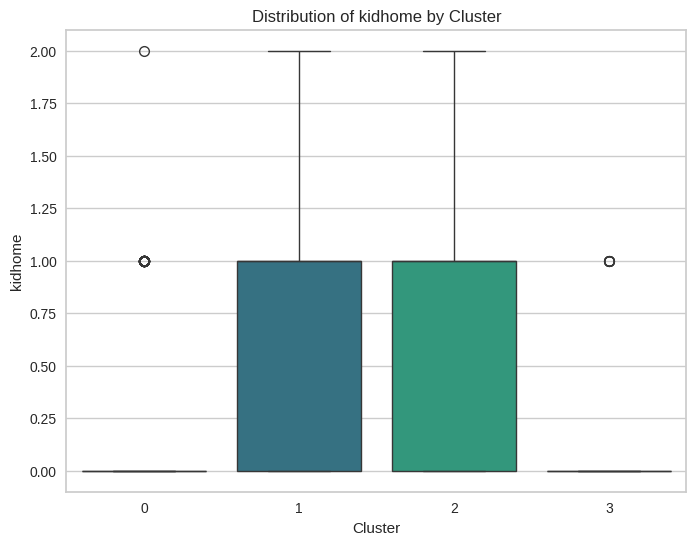

<ipython-input-111-53a63514a8b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='viridis')


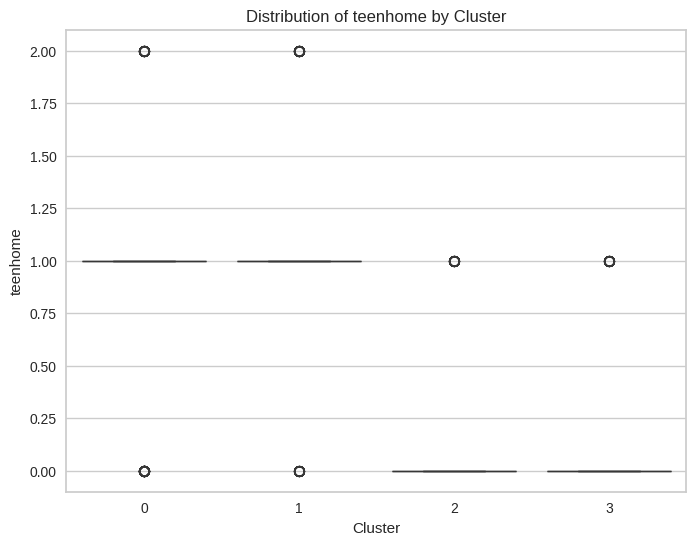

<ipython-input-111-53a63514a8b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='viridis')


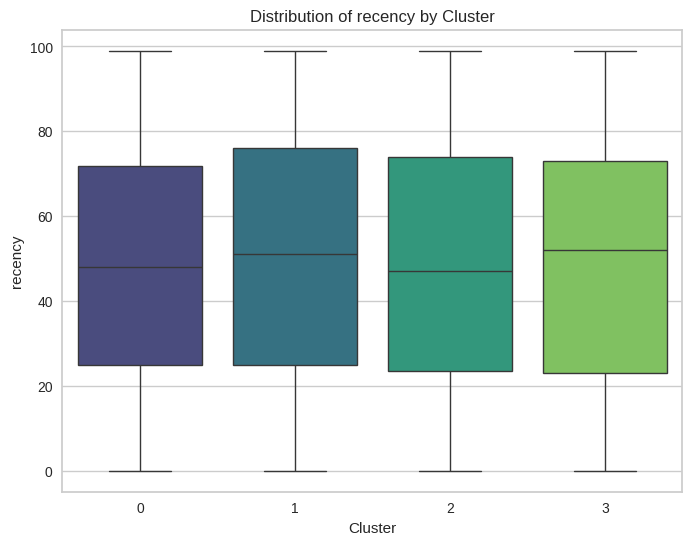

<ipython-input-111-53a63514a8b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='viridis')


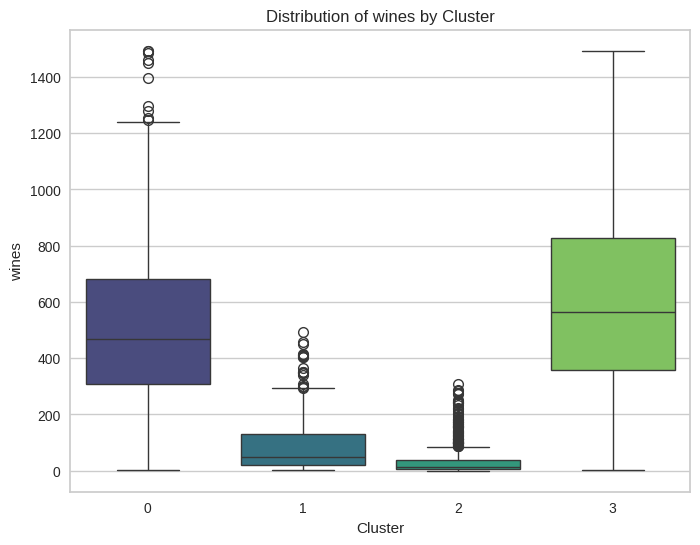

<ipython-input-111-53a63514a8b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='viridis')


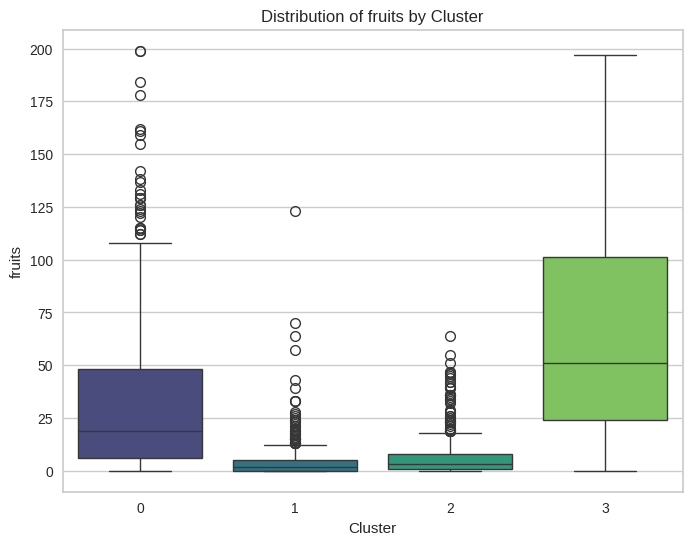

<ipython-input-111-53a63514a8b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='viridis')


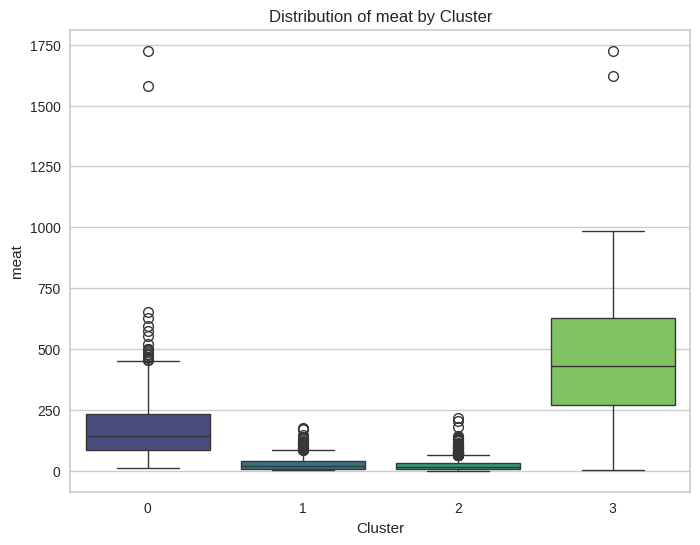

<ipython-input-111-53a63514a8b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='viridis')


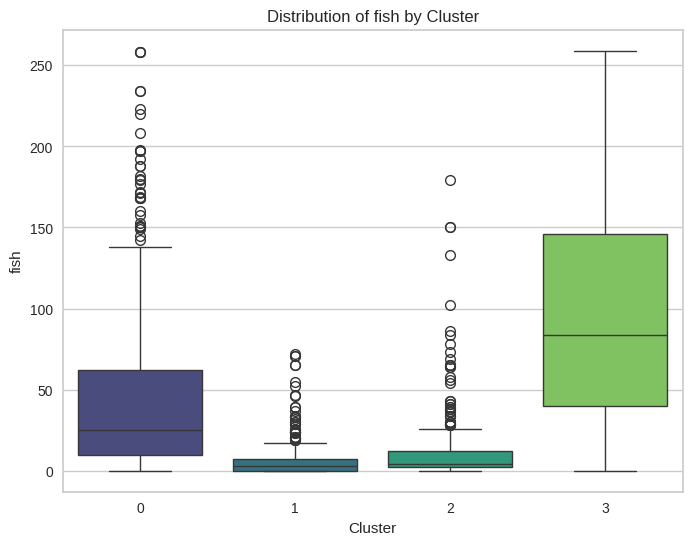

<ipython-input-111-53a63514a8b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='viridis')


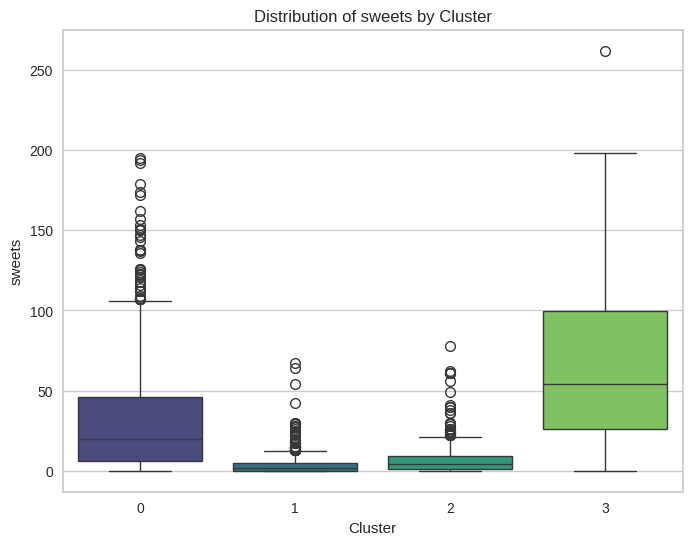

<ipython-input-111-53a63514a8b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='viridis')


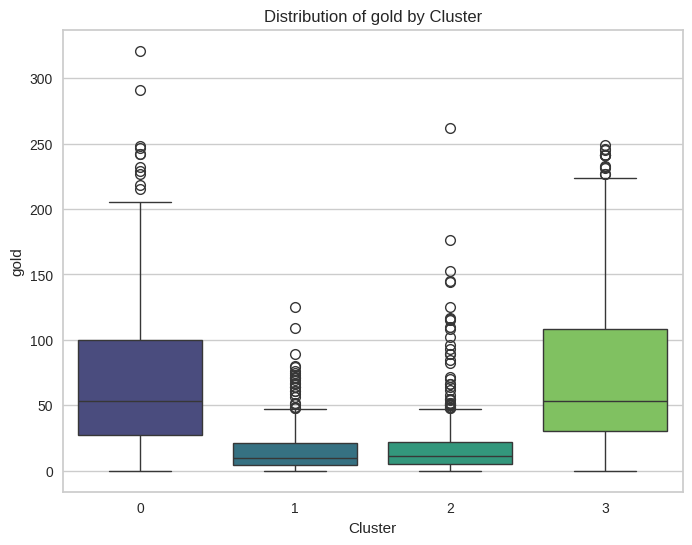

<ipython-input-111-53a63514a8b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='viridis')


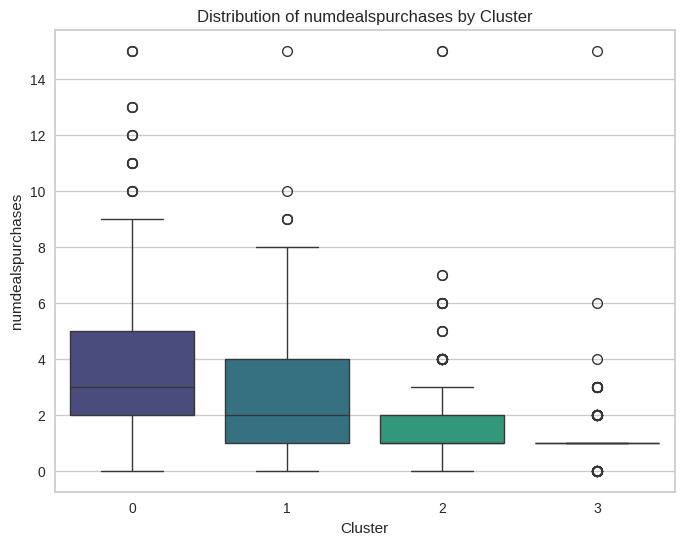

<ipython-input-111-53a63514a8b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='viridis')


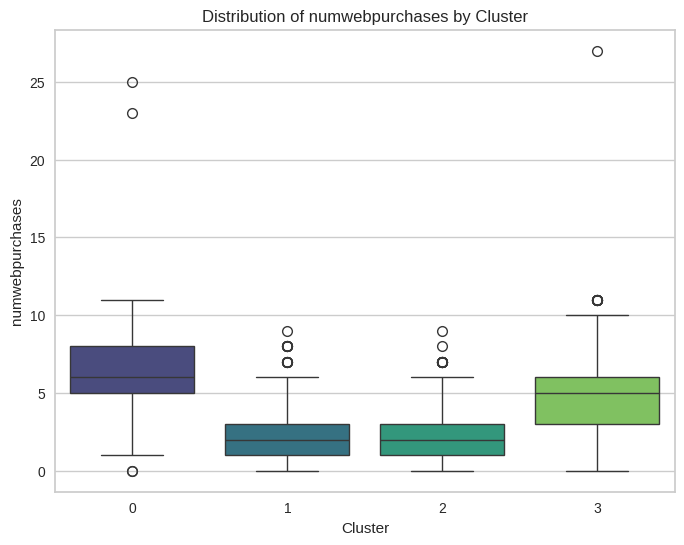

<ipython-input-111-53a63514a8b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='viridis')


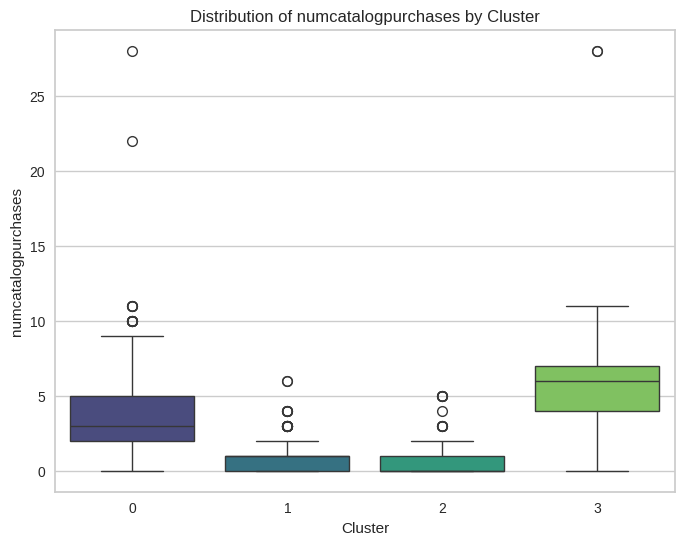

<ipython-input-111-53a63514a8b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='viridis')


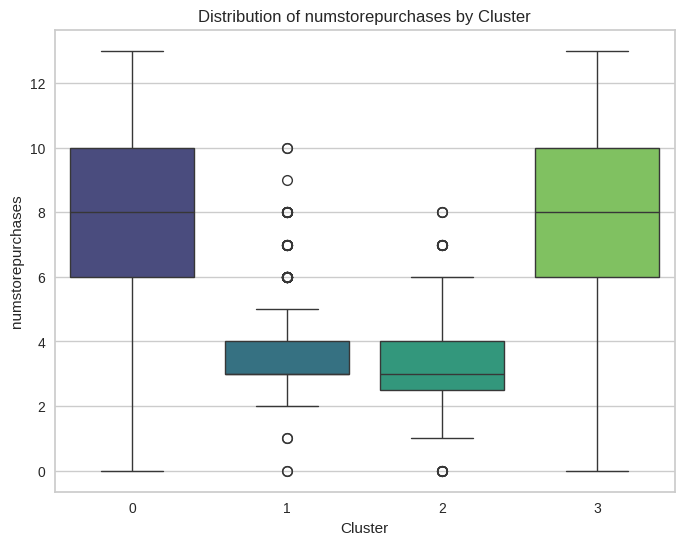

<ipython-input-111-53a63514a8b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='viridis')


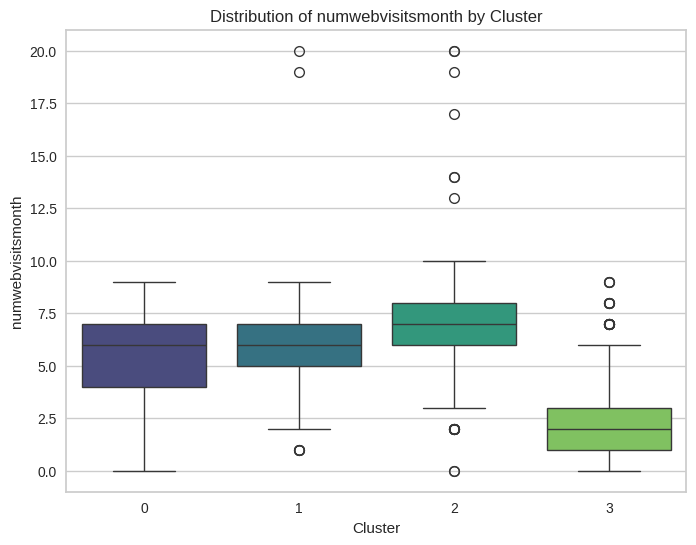

<ipython-input-111-53a63514a8b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='viridis')


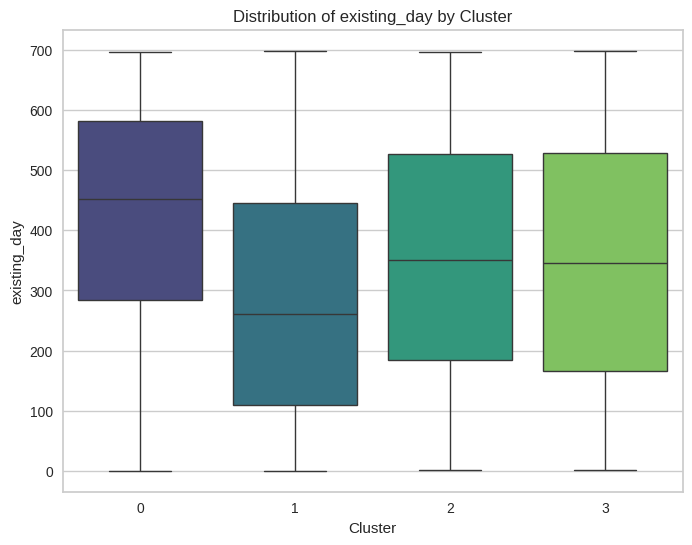

<ipython-input-111-53a63514a8b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='viridis')


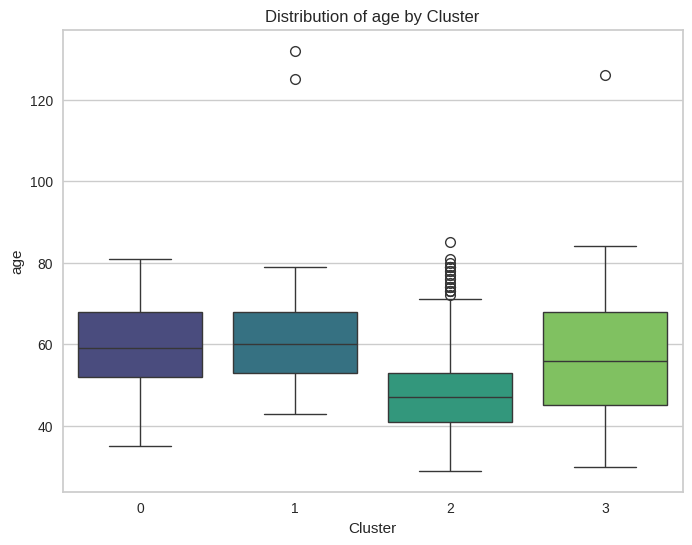

<ipython-input-111-53a63514a8b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='viridis')


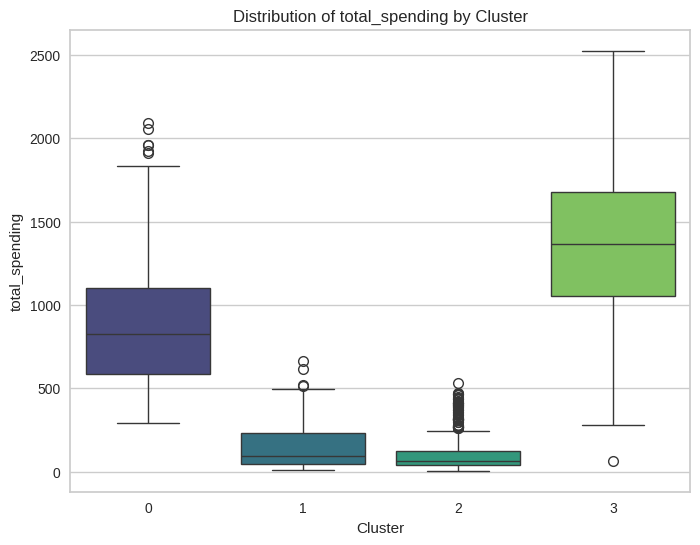

<ipython-input-111-53a63514a8b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='viridis')


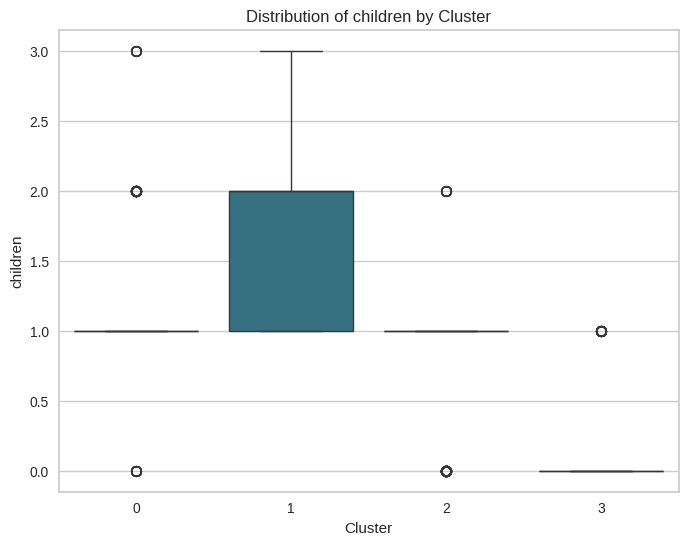

<ipython-input-111-53a63514a8b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='viridis')


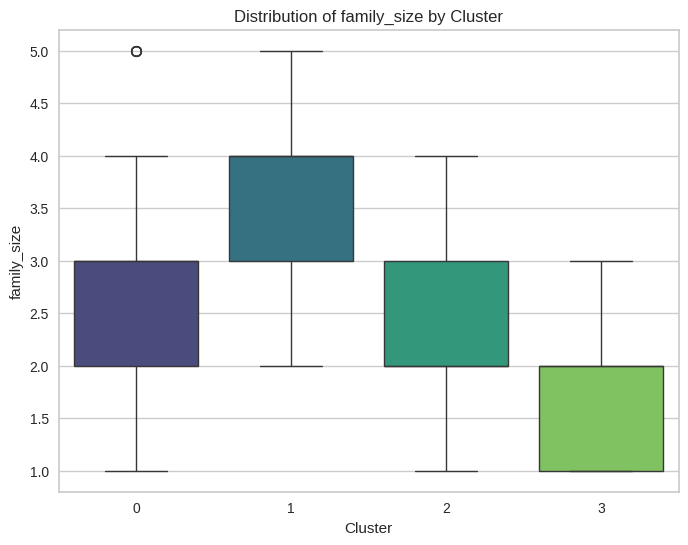

<ipython-input-111-53a63514a8b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='viridis')


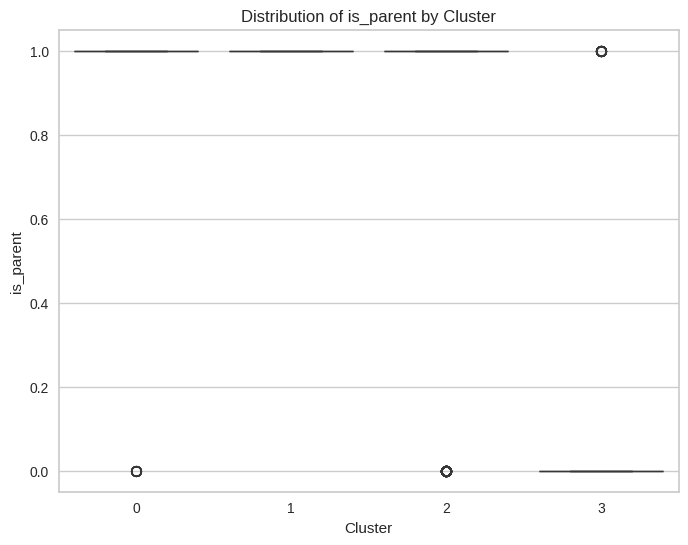

<ipython-input-111-53a63514a8b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='viridis')


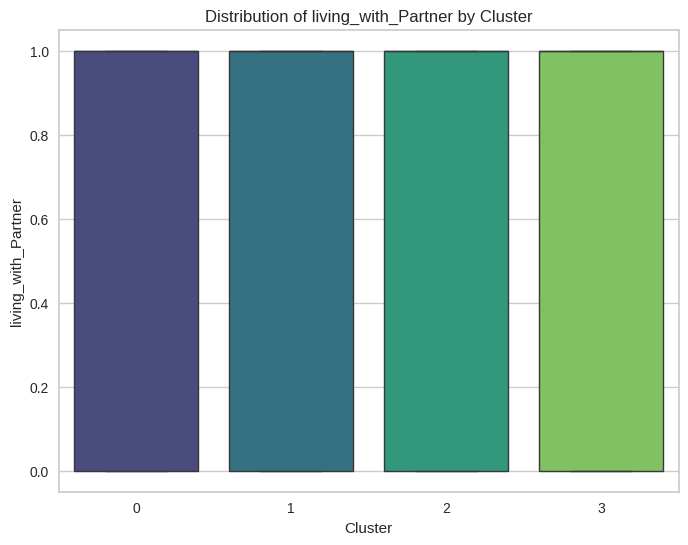

In [111]:
def plot_all_boxplots(df, features):
    for feature in features:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='cluster', y=feature, data=df, palette='viridis')
        plt.title(f'Distribution of {feature} by Cluster')
        plt.xlabel('Cluster')
        plt.ylabel(feature)
        plt.show()

# List of features to visualize
## features_to_plot = ['income', 'total_spending', 'age', 'children', 'family_size', 'meat', 'sweets', 'wines']
features_to_plot = ['education', 'income', 'kidhome', 'teenhome', 'recency', 'wines',
       'fruits', 'meat', 'fish', 'sweets', 'gold', 'numdealspurchases',
       'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases',
       'numwebvisitsmonth', 'existing_day', 'age', 'total_spending',
       'children', 'family_size', 'is_parent', 'living_with_Partner']

plot_all_boxplots(df, features_to_plot)